### 機械学習入門！クラスタリングの解説とPythonによるk-means実装
https://www.sejuku.net/blog/60630


#### クラスタリングとクラス分類
- 教師あり学習では教師データ（ラベルとデータのセットがたくさんあるもの）から、データに対するラベル付の法則性を見つけていました
- これに対して、クラスタリングは教師なし学習です
- ラベルのない”ただのデータ”から、データのクラスター（データのまとまり）をいくつか見つけます
- または、ラベルがあるデータだとしても、ラベルを使わずにクラスタをいくつか見つけます

#### k-meansとは
- k-meansはクラスタリングの最もシンプルな実装の一つです
- meanとは平均を意味し、クラスタを構成するデータの中で平均点をk個用意（最初はランダムな値で平均点を作ります）します
- 各データに対して、自分から一番近い平均点を計算します
- 一番近い平均点のクラスタが各データの所属するクラスタです
- 全てのデータのクラスタが決定したら、更にクラスターを構成するデータの中で平均点を作り直します
- そうやって平均点を更新したら、またはじめのように各データの一番近い平均点を見つけて所属クラスタを更新します
- このような処理を平均点が更新されなくなるか、ループの上限回数（これは好きに決めてください）に達するまで繰り返します

In [1]:
import seaborn as sns
 
iris = sns.load_dataset("iris") 
# ちなみにこのirisはpandasのdataframeです。
iris.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


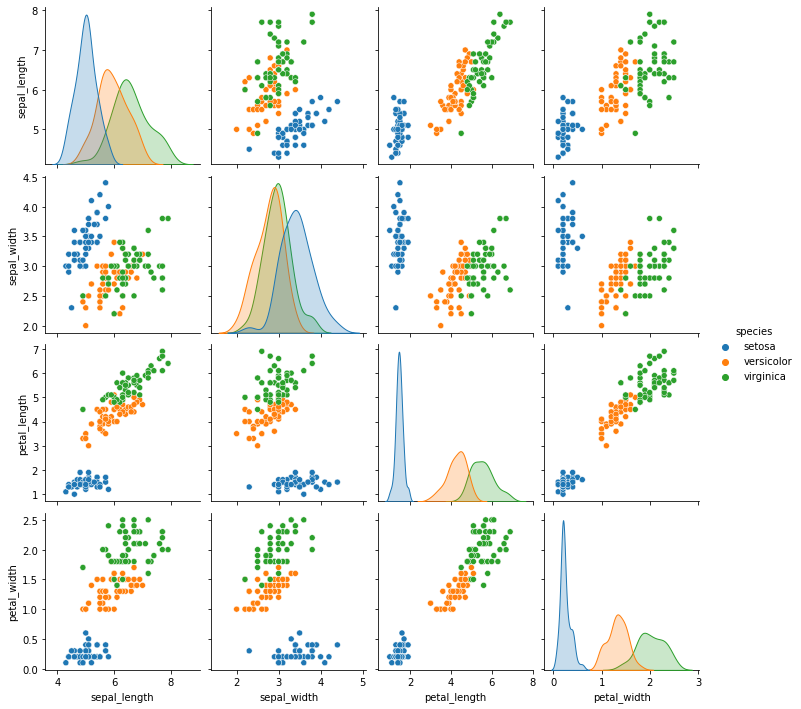

In [2]:
sns.pairplot(iris, hue = "species", diag_kind="kde")

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=30, init="random", n_jobs=-1)

#### KMeansの引数

引数 | 説明
:-----------|:------------
n_clusters | クラスタの数
max_iter | 学習のループ回数
inin | 平均の初期値の決め方
n_jobs | k-meansを何並列にするか(-1ならばpcのコア数分だけ並列してくれます）

In [4]:
cluster = kmeans.fit_predict(iris.values[:,0:4])

iris2 = iris.iloc[:,[0,1,2,3]]
iris2["cluster"] = ["cluster"+str(x) for x in cluster]
 
iris2.head(20)

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,cluster2
1,4.9,3.0,1.4,0.2,cluster2
2,4.7,3.2,1.3,0.2,cluster2
3,4.6,3.1,1.5,0.2,cluster2
4,5.0,3.6,1.4,0.2,cluster2
5,5.4,3.9,1.7,0.4,cluster2
6,4.6,3.4,1.4,0.3,cluster2
7,5.0,3.4,1.5,0.2,cluster2
8,4.4,2.9,1.4,0.2,cluster2
9,4.9,3.1,1.5,0.1,cluster2


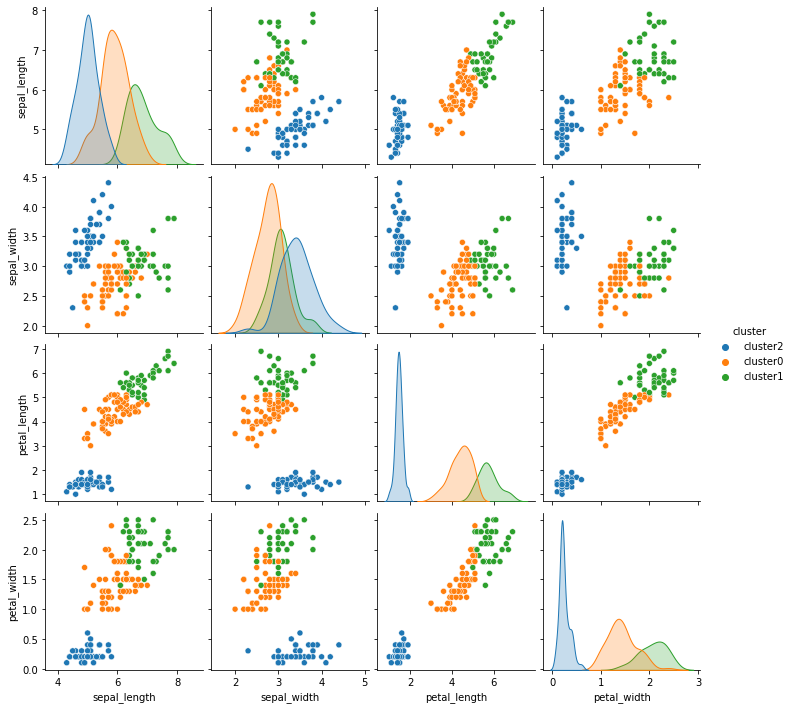

In [5]:
sns.pairplot(iris2, hue = "cluster", diag_kind="kde")

### k-meansクラスタリングをPython/NumPyで最初から実装する方法を解説
https://www.sejuku.net/blog/64365

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [7]:
iris = datasets.load_iris()       # irisを読み込む関数
df = pd.DataFrame(
    iris.data,                    # データフレームの要素
    columns = iris.feature_names  # 各列の名前に特徴名を使う
)
df["label"] = iris.target         # わかりやすくするためにlabel列を追加、ここにクラス番号を入れておきます。
 
df.head()                         # データフレームの先頭5行を表示してみましょう。

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
input_data = df.iloc[:,:-1].values # インスタンス属性valuesにアクセスすると、np.arrayが取得できます。

In [9]:
def kmeans(k, X, max_iter=300):
  X_size,n_features = X.shape

  # ランダムに重心の初期値を初期化
  centroids  = X[np.random.choice(X_size,k)]

  # 前の重心と比較するために、仮に新しい重心を入れておく配列を用意
  new_centroids = np.zeros((k, n_features))

  # 各データ所属クラスタ情報を保存する配列を用意
  cluster = np.zeros(X_size)

  # ループ上限回数まで繰り返し
  for epoch in range(max_iter):

    # 入力データ全てに対して繰り返し
    for i in range(X_size):

      # データから各重心までの距離を計算（ルートを取らなくても大小関係は変わらないので省略）
      distances = np.sum((centroids - X[i]) ** 2, axis=1)
      
      # データの所属クラスタを距離の一番近い重心を持つものに更新
      cluster[i] = np.argsort(distances)[0]
            
    # すべてのクラスタに対して重心を再計算
    for j in range(k):
      new_centroids[j] = X[cluster==j].mean(axis=0)

    # もしも重心が変わっていなかったら終了
    if np.sum(new_centroids == centroids) == k:
      print("break")
      break
    centroids =  new_centroids
  return cluster

Text(0.5, 1.0, 'true label')

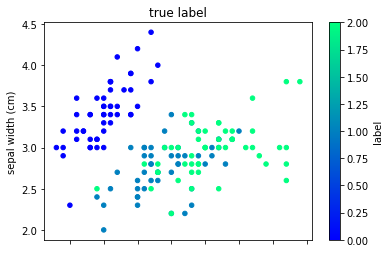

In [10]:
cluster=kmeans(3, input_data)

df["cluster"] = cluster
 
df.plot(kind="scatter", x=0,y=1,c="label", cmap="winter") # cmapで散布図の色を変えられます。
plt.title("true label")

Text(0.5, 1.0, 'clustering relust')

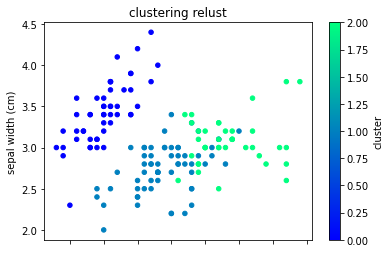

In [11]:
df.plot(kind="scatter", x=0,y=1,c="cluster", cmap="winter")
plt.title("clustering relust")

### 教師なし学習をPythonで実装してみる（PCAとk平均法）
https://konchangakita.hatenablog.com/entry/2020/01/06/230000

<font color = red>**データ不明**</font>

In [ ]:
import numpy as np
data = np.loadtxt('./data1.txt') 
print(data.shape)

#(60, 3)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(data)
print(X2D.shape)

#(60, 2)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

data2 = np.loadtxt('./data2.txt') 

plt.plot(data2[:, 0], data2[:, 1], 'bo')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(3) # 3種類のグループに分ける

data2_clst = km.fit_transform(data2)
color = ["red", "blue", "green"]

for i in range(data2.shape[0]):
  plt.scatter(data2[i,0], data2[i,1], c=color[int(km.labels_[i])])

plt.show()

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(5) # 5種類のグループに分ける

data2_clst = km.fit_transform(data2)
color = ["red", "blue", "green", "yellow", "black"]
for i in range(data2.shape[0]):
    plt.scatter(data2[i,0], data2[i,1], c=color[int(km.labels_[i])])
plt.show()

### Pythonによるk-meansクラスタリングの実装方法を現役エンジニアが解説【初心者向け】
https://techacademy.jp/magazine/28780

In [12]:
from matplotlib import pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.cluster import KMeans
import numpy as np 
import pandas as pd

In [13]:
# https://scikit-learn.org/stable/datasets/index.html

wine_data = datasets.load_wine()
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
print(df.head())

   alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
0    14.23        1.71  2.43  ...  1.04                          3.92   1065.0
1    13.20        1.78  2.14  ...  1.05                          3.40   1050.0
2    13.16        2.36  2.67  ...  1.03                          3.17   1185.0
3    14.37        1.95  2.50  ...  0.86                          3.45   1480.0
4    13.24        2.59  2.87  ...  1.04                          2.93    735.0

[5 rows x 13 columns]


In [14]:
X=df[["alcohol","color_intensity"]]
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)
print(type(X_norm))

<class 'numpy.ndarray'>


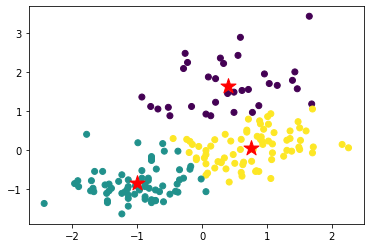

In [15]:
cls = KMeans(n_clusters=3)
result = cls.fit(X_norm)

plt.scatter(X_norm[:,0],X_norm[:,1], c=result.labels_)
plt.scatter(result.cluster_centers_[:,0],result.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.show()

### k-meansを実装して幸せな年末を迎える
https://qiita.com/navitime_tech/items/bb1bd01537bc2713444a

#### クラスタリングとは
- 「教師あり学習」はあらかじめ「正解」のデータ(学習用データ)を用意し、それと同じ傾向の答えを導き出す学習方法です
- 対して「教師なし学習」は「正解」のデータがないものに対して、構造の解析を行い答えを導き出す学習方法です

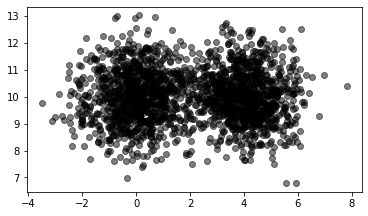

In [16]:
# kohaku_data

# サンプルデータ作成
import numpy as np

# seed値固定
np.random.seed(874)
# x座標
x = np.r_[np.random.normal(size=1000,loc=0,scale=1),
          np.random.normal(size=1000,loc=4,scale=1)]
# y座標
y = np.r_[np.random.normal(size=1000,loc=10,scale=1),
          np.random.normal(size=1000,loc=10,scale=1)]
data = np.c_[x, y]


# 可視化処理
import matplotlib.pyplot as plt
% matplotlib inline

p = plt.subplot()
p.scatter(data[:,0], data[:,1], c = "black", alpha = 0.5)
p.set_aspect('equal')
plt.show()

#### アルゴリズム解説
##### k-meansは以下のようにクラスタリングを進めます
1. クラスタ数(何種類に分類したいか)を決める
2. クラスタ数だけ中心点を用意する
3. 各データ点は一番近い中心点を自分の所属するクラスタとする
4. 同一クラスタに所属するデータ点の重心を新しい中心点とする
5. 収束する(中心点が移動しなくなる)まで2から4を繰り返す

In [17]:
# kohaku_init

# クラスタ数
n_clusters = 2
# 最大ループ数
max_iter = 300
# 所属クラスタ
clusters = np.random.randint(0, n_clusters, data.shape[0])

In [18]:
# kohaku

for _ in range(max_iter):
  # 中心点の更新
  # 各クラスタのデータ点の平均をとる
  centroids = np.array([data[clusters == n, :].mean(axis = 0) for n in range(n_clusters)])

  # 所属クラスタの更新
  # 一番近い中心点のクラスタを所属クラスタに更新する
  # np.linalg.normでノルムが計算できる
  # argminで最小値のインデックスを取得できる
  new_clusters = np.array([np.linalg.norm(data - c, axis = 1) for c in centroids]).argmin(axis = 0)

  # 空のクラスタがあった場合は中心点をランダムな点に割り当てなおす
  for n in range(n_clusters):
    if not np.any(new_clusters == n):
      centroids[n] = data[np.random.choice(data.shape[0], 1), :]

  # 収束判定
  if np.allclose(clusters, new_clusters):
    break

  clusters = new_clusters

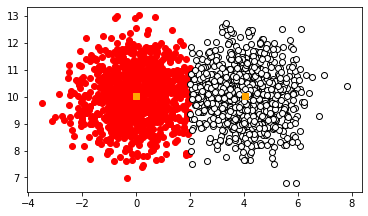

In [19]:
# kohaku_visualization

p = plt.subplot()

p.scatter(data[clusters==0, 0], data[clusters==0, 1], c = 'red')
p.scatter(data[clusters==1, 0], data[clusters==1, 1], c = 'white', edgecolors='black')
# 中心点
p.scatter(centroids[:, 0], centroids[:, 1], color='orange', marker='s')

p.set_aspect('equal')

plt.show()

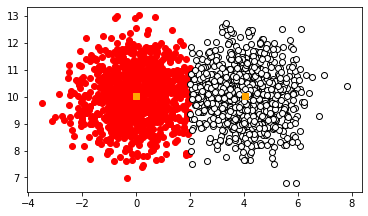

In [20]:
from sklearn.cluster import KMeans

# k-means
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
clusters_sklearn = km.fit_predict(data)

# 可視化処理
p = plt.subplot()
p.scatter(data[clusters_sklearn==0, 0], data[clusters_sklearn==0, 1], c = 'red')
p.scatter(data[clusters_sklearn==1, 0], data[clusters_sklearn==1, 1], c = 'white', edgecolors='black')
p.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[: ,1], color='orange', marker='s')
p.set_aspect('equal')
plt.show()

#### 補足
- ちなみにk-meansには欠点があります
- 今回のようにランダムで初期クラスタを決定すると、中心点の初期位置が近くなり、意図しないクラスタリングになることがあります
- この欠点を補う方法として、k-means++という方法があります
- k-means++は中心点の初期位置がお互いに離れるようにしてあげる方法です
- k-means++を用いることで適切なクラスタリングができるようになるだけではなく、計算速度も向上する(ループ回数が減る)ので、興味のある方はぜひ調べてみてください